In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
93,16.32,4.30,Female,Yes,Fri,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
203,16.40,2.50,Female,Yes,Thur,Lunch,2
59,48.27,6.73,Male,No,Sat,Dinner,4
75,10.51,1.25,Male,No,Sat,Dinner,2


In [3]:
titanic = pd.read_csv('titanic.csv')
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [4]:
iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
86,6.7,3.1,4.7,1.5,versicolor
87,6.3,2.3,4.4,1.3,versicolor
55,5.7,2.8,4.5,1.3,versicolor
109,7.2,3.6,6.1,2.5,virginica
44,5.1,3.8,1.9,0.4,setosa


In [5]:
flights = sns.load_dataset('flights')
flights.sample(5)

,year,month,passengers
51,1953,Apr,235
132,1960,Jan,417
63,1954,Apr,227
120,1959,Jan,360
4,1949,May,121


## EDA using Bivariate and Multivariate Analysis

### scatterplot (Numerical - Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

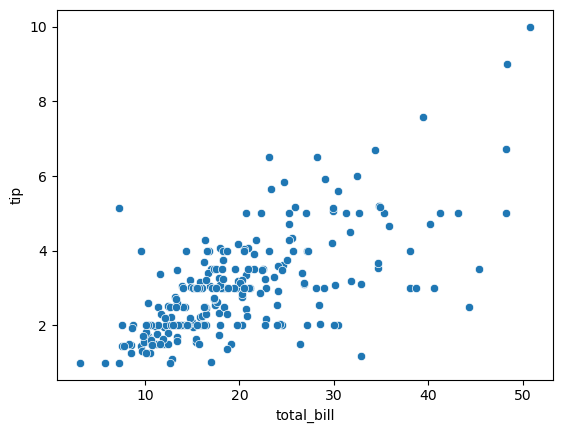

In [6]:
# bivariate analysis
sns.scatterplot(data=tips , x='total_bill',y='tip')
# a linear relationship exist bewteen total bill and tips

<Axes: xlabel='total_bill', ylabel='tip'>

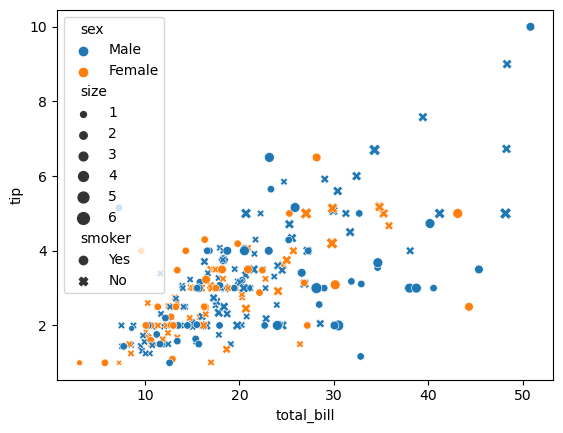

In [7]:
# multivariate analysis
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='sex',style='smoker',size='size')
# male are giving more tip than female
# 

### barplot (Numerical - Categorical)

<Axes: xlabel='Survived', ylabel='Sex'>

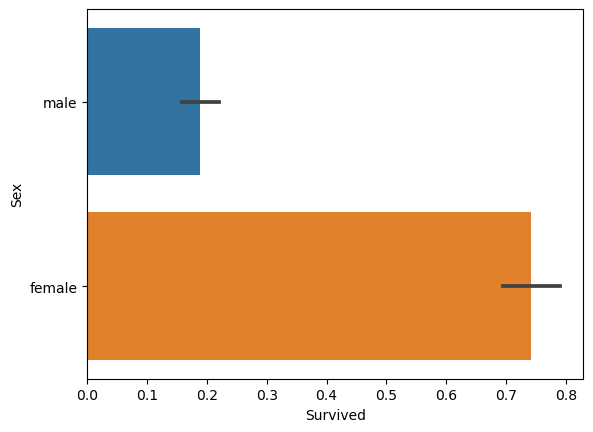

In [8]:
# how many males and females are survived
sns.barplot(data=titanic,x='Survived',y='Sex')
# males are less survied than females

<Axes: xlabel='Pclass', ylabel='Survived'>

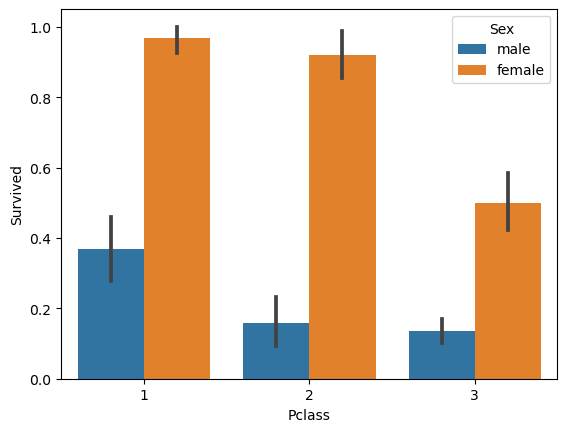

In [9]:
sns.barplot(data=titanic,x='Pclass',y='Survived',hue='Sex')
# in all classes cabins more females are surrvide is more
# in 1St class more males are surrvived
# int 2nd 3rd the males survided are almost equal

### boxplot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

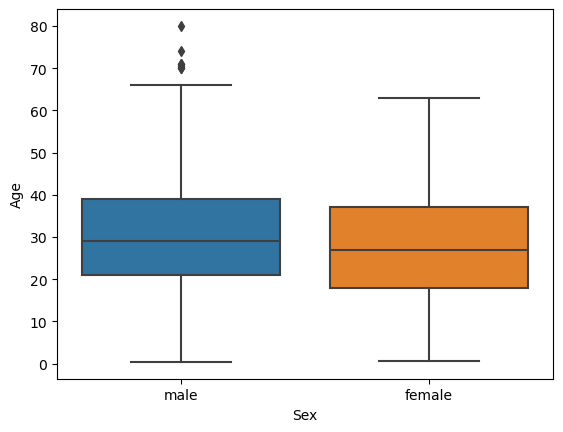

In [10]:
sns.boxplot(data=titanic,x='Sex',y='Age')

### distplot (Numerical - Categorical)

/tmp/ipykernel_81595/33521708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==1]["Age"])
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

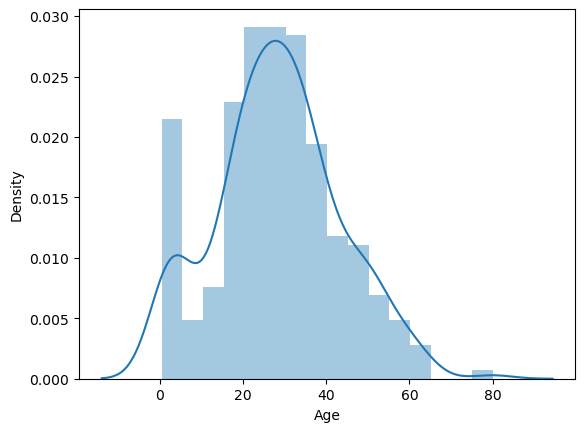

In [11]:
sns.distplot(titanic[titanic['Survived']==1]["Age"])

### heatmap (categorical - categorical)

In [12]:
SxP = pd.crosstab(titanic['Pclass'],titanic['Survived'])
SxP

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

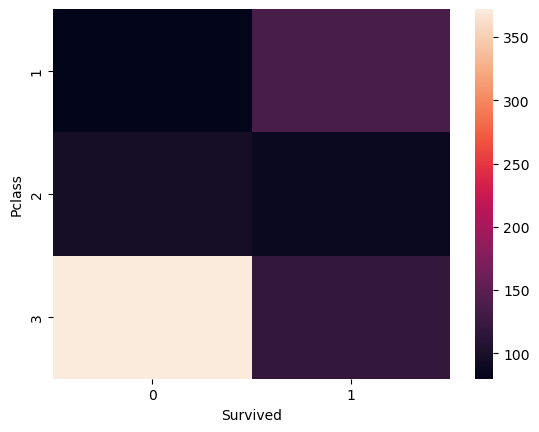

In [13]:
sns.heatmap(SxP)
# it says that the 1st class pepople are more survived than 3rd class people

In [14]:
# percentage gives the best analysis
titanic.groupby('Pclass').mean(numeric_only=True)['Survived']*100
# 63% survived in 1st class
# 47%survived int 2nd calss
# 24% survived in 3rd calss

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

### clustermap (Categorical - Categorical)

In [53]:
data = pd.crosstab(titanic['Age'],titanic['Survived'])
data

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


In [54]:
titanic[titanic['Age']==0.75]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C


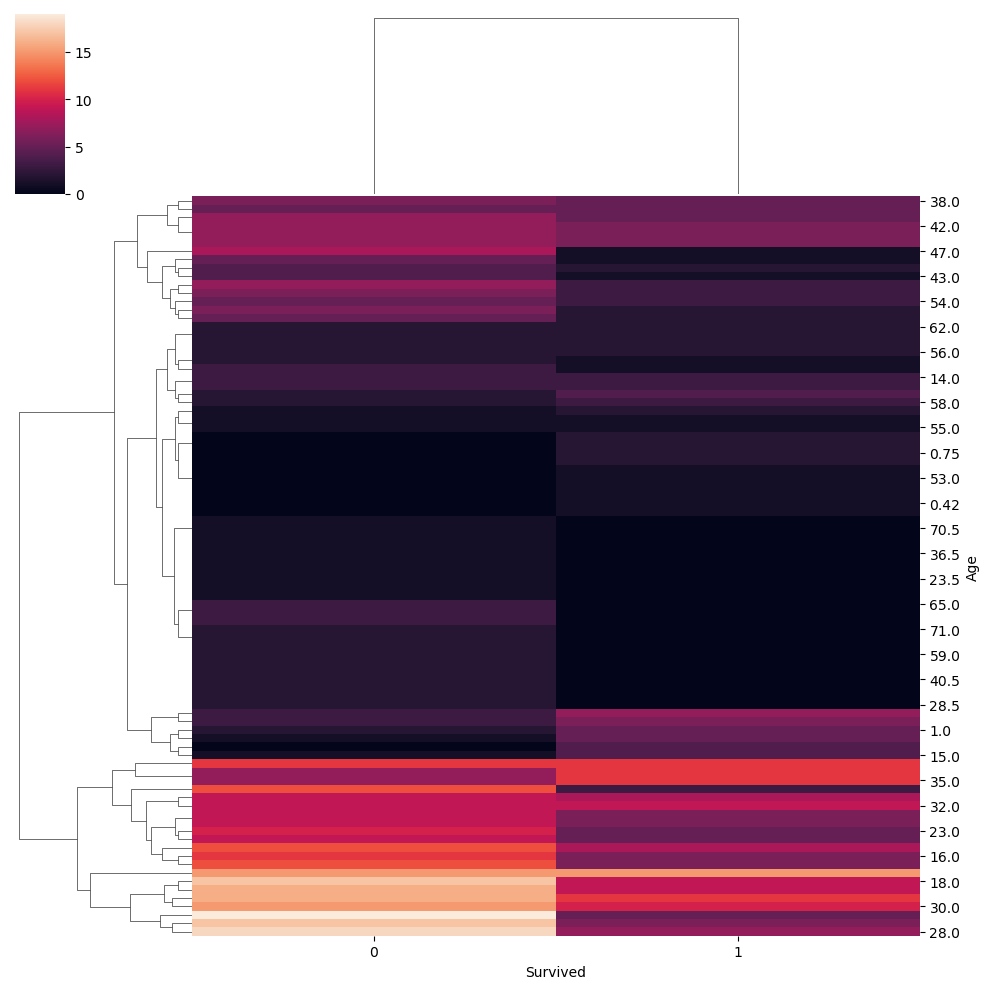

In [55]:
sns.clustermap(data)

### piarplot

In [56]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

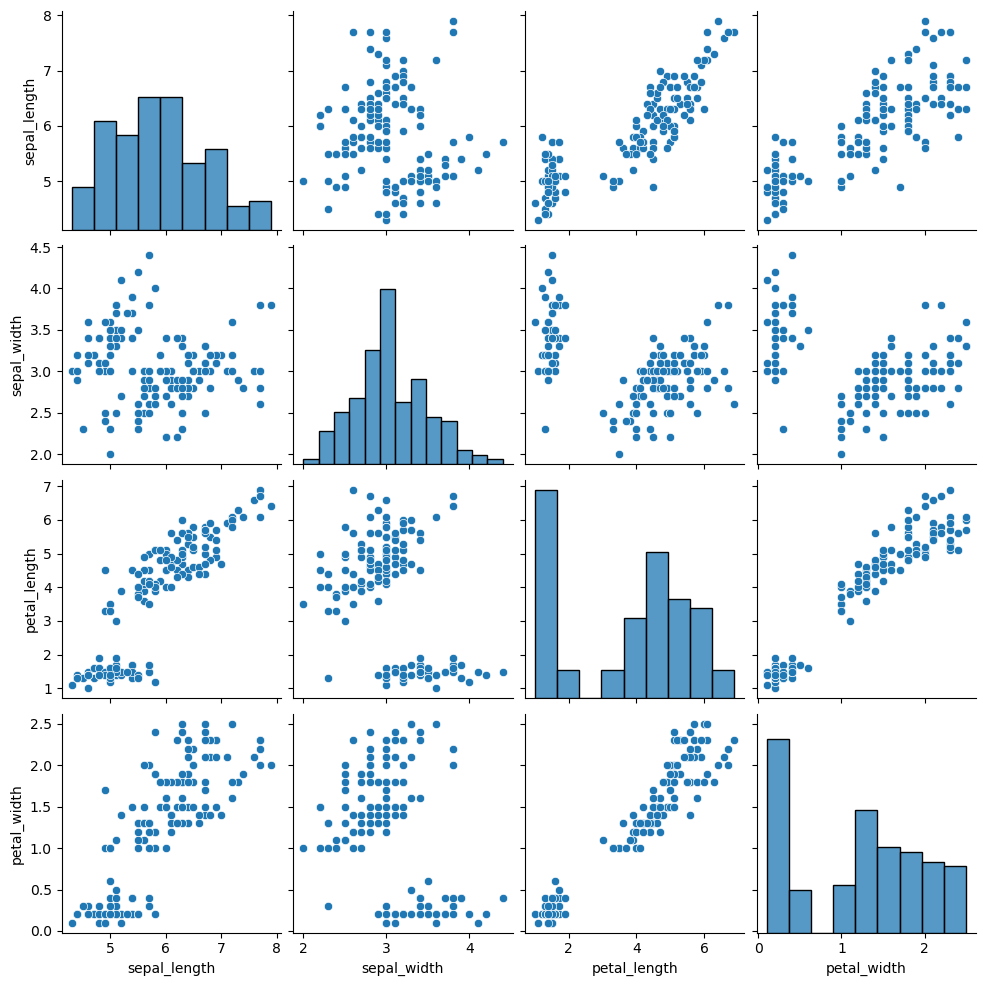

In [57]:
sns.pairplot(data=iris)

/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.

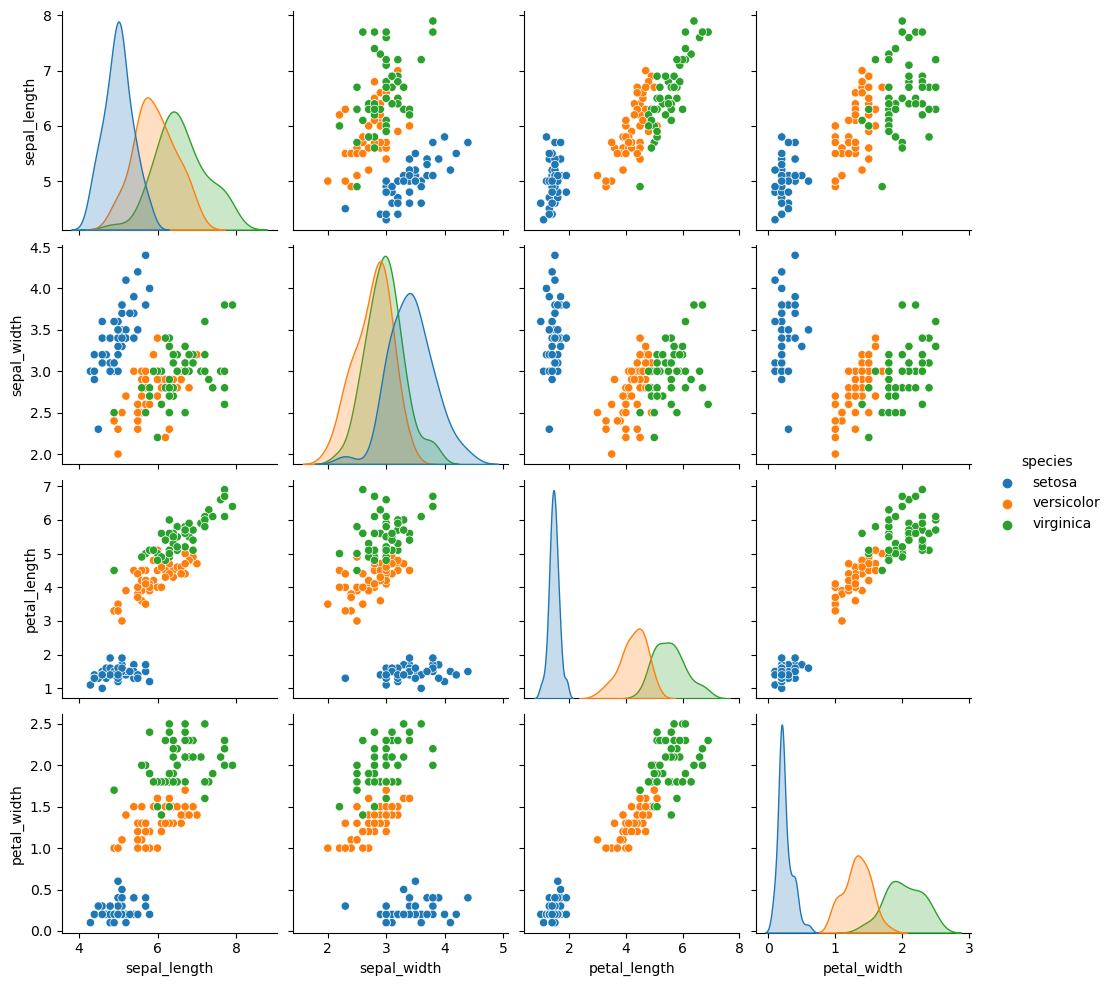

In [60]:
sns.pairplot(data=iris,hue='species')

### lineplot (Numerical - Numericla) (for time series data)

In [62]:
flights.sample(5)

,year,month,passengers
73,1955,Feb,233
23,1950,Dec,140
106,1957,Nov,305
123,1959,Apr,396
137,1960,Jun,535


/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='passengers'>

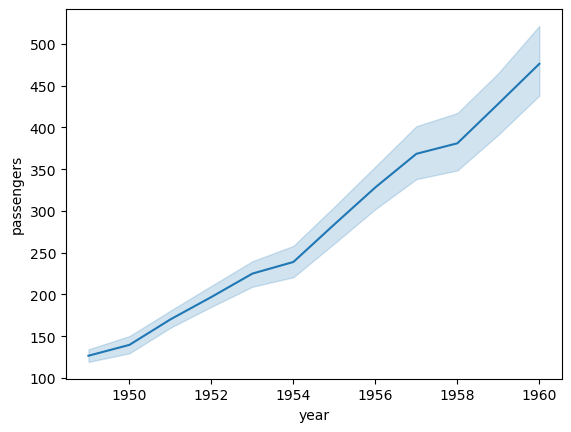

In [63]:
sns.lineplot(data=flights,x='year',y='passengers')

In [67]:
data = pd.pivot_table(data=flights,index='month',columns='year',values='passengers')

/tmp/ipykernel_81595/1730849776.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data = pd.pivot_table(data=flights,index='month',columns='year',values='passengers')


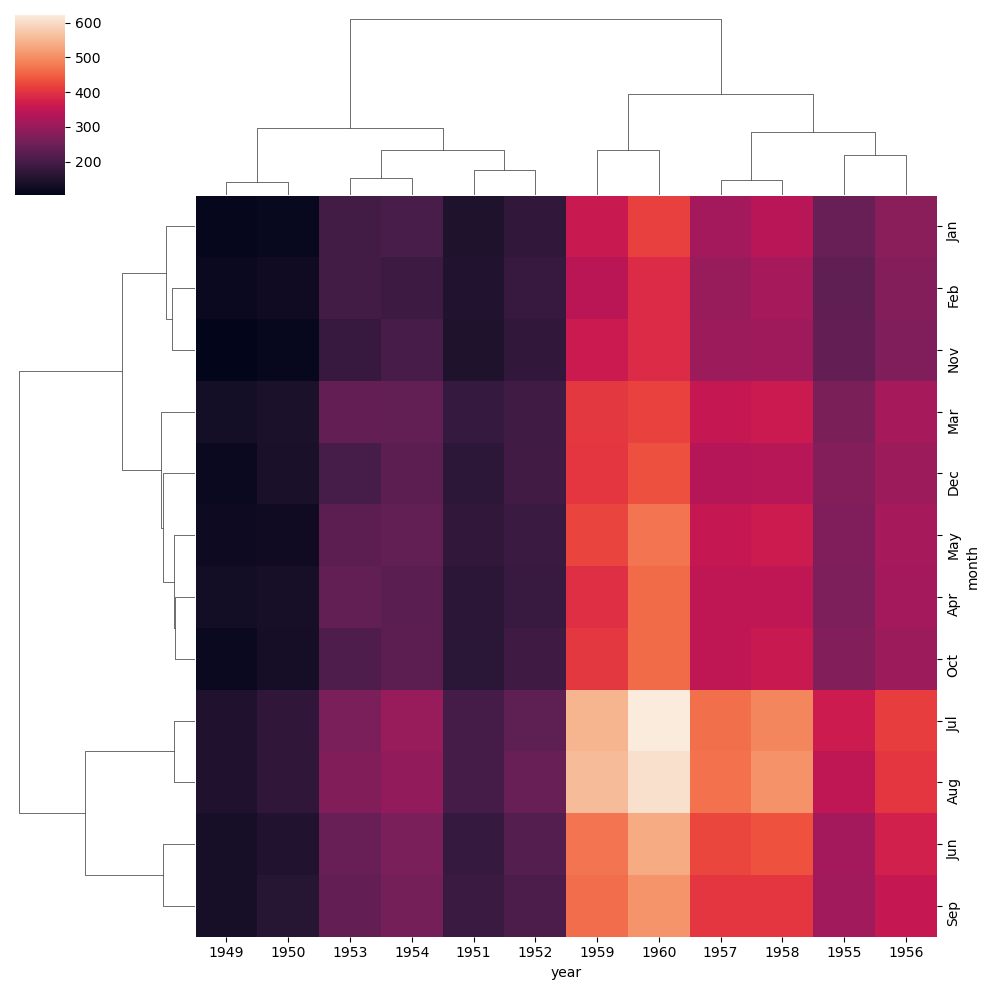

In [68]:
sns.clustermap(data)